In [395]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [396]:
df = pd.read_csv('employee.csv')
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [397]:
print(np.unique(df['Education']))
print(np.unique(df['City']))
print(np.unique(df['Gender']))
print(np.unique(df['EverBenched']))

['Bachelors' 'Masters' 'PHD']
['Bangalore' 'New Delhi' 'Pune']
['Female' 'Male']
['No' 'Yes']


In [398]:
educationMapping = {'Bachelors': 1, 'Masters': 2, 'PHD': 3}
cityMapping = {'Bangalore': 1, 'New Delhi': 2, 'Pune': 3}
genderMapping = {'Male': 1, 'Female': 2}
everBenchedMapping = {'No': 1, 'Yes': 2}

df['Education'] = df['Education'].map(educationMapping)
df['City'] = df['City'].map(cityMapping)
df['Gender'] = df['Gender'].map(genderMapping)
df['EverBenched'] = df['EverBenched'].map(everBenchedMapping)

In [399]:
df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,1,3,34,1,1,0,0
1,1,2013,3,1,28,2,1,3,1
2,1,2014,2,3,38,2,1,2,0
3,2,2016,1,3,27,1,1,5,1
4,2,2017,3,3,24,1,2,2,1
5,1,2016,1,3,22,1,1,0,0
6,1,2015,2,3,38,1,1,0,0
7,1,2016,1,3,34,2,1,2,1
8,1,2016,3,3,23,1,1,1,0
9,2,2017,2,2,37,1,1,2,0


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int64
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int64
 6   EverBenched                4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


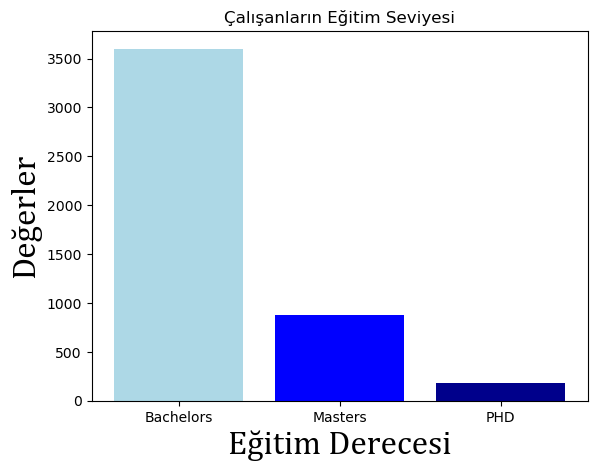

In [401]:
plt.title('Çalışanların Eğitim Seviyesi')

plt.xlabel('Eğitim Derecesi', loc='center', fontsize=24, fontname='Cambria')
plt.ylabel('Değerler', loc='center', fontsize=24, fontname='Cambria')

workersDegrees = np.array(['Bachelors', 'Masters', 'PHD'])
values = df['Education'].value_counts()

plt.bar(workersDegrees,
        values,
        color = ['lightblue', 'blue', 'darkblue'],
        )
plt.show()

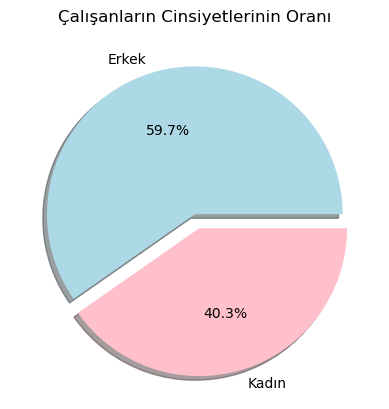

In [402]:
plt.title('Çalışanların Cinsiyetlerinin Oranı')

percentage = df['Gender'].value_counts().sort_values(ascending=False)
genders = np.array(['Erkek', 'Kadın'])

plt.pie(percentage,
        labels=genders,
        explode=[0, 0.1],
        colors=['lightblue', 'pink'],
        shadow=True,
        autopct='%1.1f%%'
        )
plt.show()

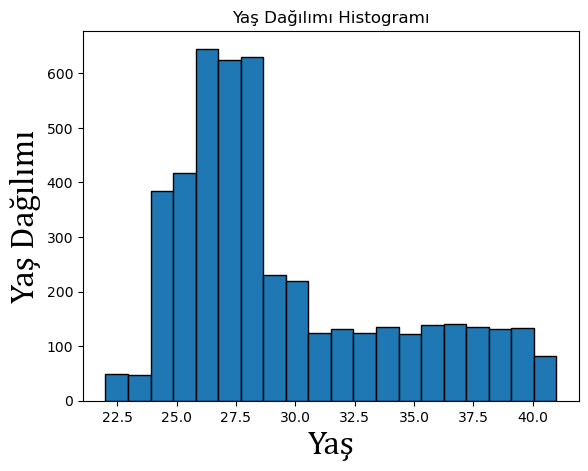

In [403]:
plt.title('Yaş Dağılımı Histogramı')

plt.xlabel('Yaş', fontsize=24, fontname='Cambria')
plt.ylabel('Yaş Dağılımı', fontsize=24, fontname='Cambria')

plt.hist(df['Age'], bins=20, edgecolor='black')
plt.show()

In [404]:
xSample = df.iloc[:, 0:-1]
ySample = df.LeaveOrNot

xSample.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
ySample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int64
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int64
 6   EverBenched                4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
dtypes: int64(8)
memory usage: 290.9 KB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.series.Series'>
RangeIndex: 4653 entries, 0 to 4652
Series name: LeaveOrNot
Non-Null Count  Dtype
--------------  -----
4653 non-null   int64
dtypes: int64(1)
memory usage: 36.5 KB


In [405]:
print(xSample)

      Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
0             1         2017     1            3   34       1            1   
1             1         2013     3            1   28       2            1   
2             1         2014     2            3   38       2            1   
3             2         2016     1            3   27       1            1   
4             2         2017     3            3   24       1            2   
...         ...          ...   ...          ...  ...     ...          ...   
4648          1         2013     1            3   26       2            1   
4649          2         2013     3            2   37       1            1   
4650          2         2018     2            3   27       1            1   
4651          1         2012     1            3   30       1            2   
4652          1         2015     1            3   33       1            2   

      ExperienceInCurrentDomain  
0                             0  
1      

In [406]:
print(ySample)

0       0
1       1
2       0
3       1
4       1
       ..
4648    0
4649    1
4650    1
4651    0
4652    0
Name: LeaveOrNot, Length: 4653, dtype: int64


In [407]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ySample = le.fit_transform(ySample)
print(ySample)

[0 1 0 ... 1 0 0]


In [408]:
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2017,1,3,34,1,1,0,0
1,1,2013,3,1,28,2,1,3,1
2,1,2014,2,3,38,2,1,2,0
3,2,2016,1,3,27,1,1,5,1
4,2,2017,3,3,24,1,2,2,1


In [409]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xSample, ySample, test_size=0.2, random_state=42)

print(f'xSample: {xSample.shape}')
print(f'ySample: {ySample.shape}')
print(f'xTrain: {xTrain.shape}')
print(f'yTrain: {yTrain.shape}')
print(f'xTest: {xTest.shape}')
print(f'yTest: {yTest.shape}')

xSample: (4653, 8)
ySample: (4653,)
xTrain: (3722, 8)
yTrain: (3722,)
xTest: (931, 8)
yTest: (931,)


In [410]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xTrain = sc.fit_transform(xTrain)
xTest = sc.fit_transform(xTest)

print(xTrain)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(xTest)

[[ 1.40859778 -1.10973993  0.25218129 ... -0.81567419 -0.33373122
  -1.86154964]
 [-0.51043624 -1.64567506 -0.94199015 ... -0.81567419 -0.33373122
   0.06130543]
 [ 1.40859778  1.03400058  1.44635272 ... -0.81567419 -0.33373122
  -0.57964626]
 ...
 [-0.51043624  0.49806545 -0.94199015 ...  1.2259797  -0.33373122
  -1.22059795]
 [-0.51043624 -0.03786968 -0.94199015 ... -0.81567419 -0.33373122
  -1.22059795]
 [-0.51043624 -0.03786968 -0.94199015 ... -0.81567419 -0.33373122
   1.34320881]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[-0.49695053  0.52257452 -0.94621747 ...  1.18299811 -0.35653702
  -0.58779234]
 [-0.49695053 -1.09734848 -0.94621747 ...  1.18299811 -0.35653702
   0.70285546]
 [-0.49695053  1.06254885  0.21749252 ...  1.18299811 -0.35653702
   0.05753156]
 ...
 [-0.49695053  1.60252318  1.38120252 ... -0.84530989  2.80475786
   0.70285546]
 [-0.49695053 -1.63732282 -0.94621747 ... -0.84530989 -0.35653702
   0.70285546]
 [-0.49695053 -1.63732282 -0.946

## **K-NN**

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       610
           1       0.84      0.64      0.73       321

    accuracy                           0.83       931
   macro avg       0.84      0.79      0.80       931
weighted avg       0.83      0.83      0.83       931



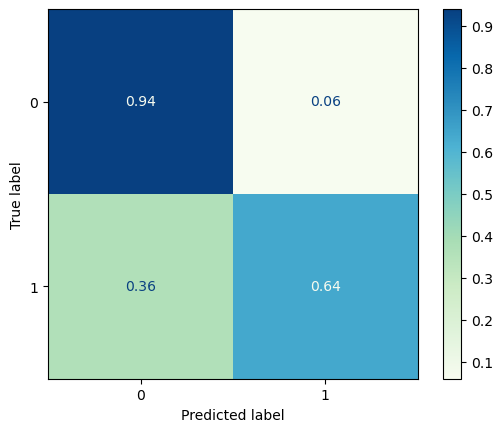

In [369]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=1)
classifier.fit(xTrain, yTrain)

yTestPred = classifier.predict(xTest)
print(metrics.classification_report(yTest, yTestPred))

cm = metrics.confusion_matrix(yTest, yTestPred, normalize='true').round(2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu, values_format='g')

## **Decision Tree**

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       610
           1       0.73      0.65      0.69       321

    accuracy                           0.79       931
   macro avg       0.78      0.76      0.77       931
weighted avg       0.79      0.79      0.79       931



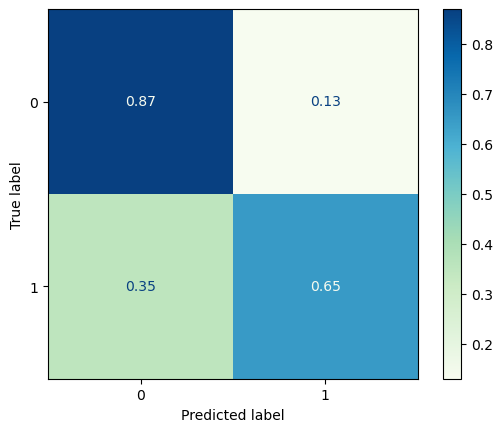

In [370]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=42)
classifier.fit(xTrain, yTrain)

yTestPred = classifier.predict(xTest)
print(metrics.classification_report(yTest, yTestPred))

cm = metrics.confusion_matrix(yTest, yTestPred, normalize='true').round(2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu, values_format='g')

#tree.plot_tree(classifier)

## **Random Forest**

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       610
           1       0.94      0.64      0.76       321

    accuracy                           0.86       931
   macro avg       0.89      0.81      0.83       931
weighted avg       0.87      0.86      0.85       931



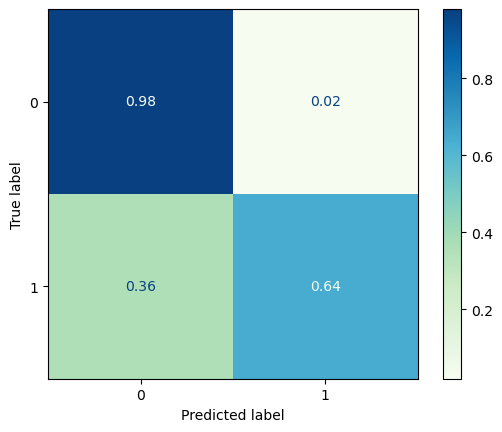

In [371]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=50, max_depth=11, random_state=42)
classifier.fit(xTrain, yTrain)

yTestPred = classifier.predict(xTest)
print(metrics.classification_report(yTest, yTestPred))

cm = metrics.confusion_matrix(yTest, yTestPred, normalize='true').round(2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu, values_format='g')

## **SVM**

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       610
           1       0.93      0.67      0.78       321

    accuracy                           0.87       931
   macro avg       0.89      0.82      0.84       931
weighted avg       0.87      0.87      0.86       931



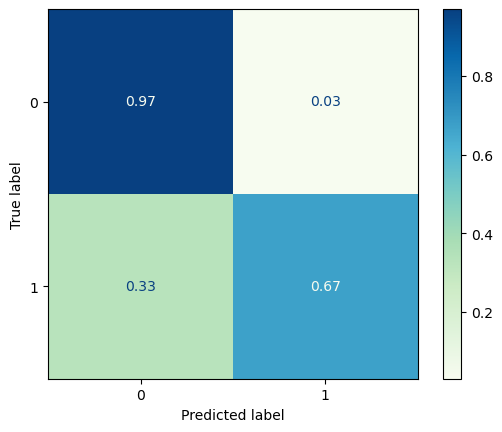

In [412]:
from enum import auto
from sklearn.svm import SVC

#c=15, kernel='rbf', gamma=0.1 -- 0.83 - 0.80

classifier = SVC(C=17,
                 kernel='rbf',
                 gamma="auto")

classifier.fit(xTrain, yTrain)
yTestPred = classifier.predict(xTest)
print(metrics.classification_report(yTest, yTestPred))

cm = metrics.confusion_matrix(yTest, yTestPred, normalize='true').round(2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu, values_format='g')

## **Naive Bayes**

### **Bernoulli**

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       610
           1       0.57      0.40      0.47       321

    accuracy                           0.69       931
   macro avg       0.65      0.62      0.63       931
weighted avg       0.67      0.69      0.67       931



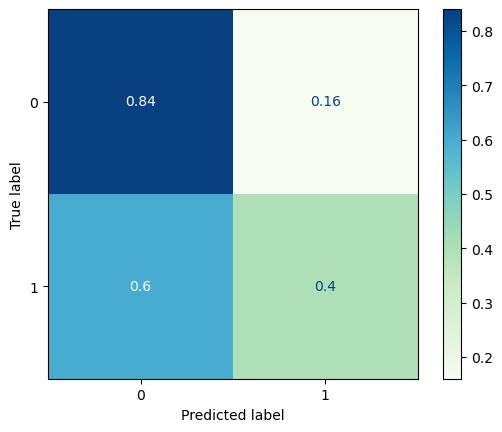

In [411]:
from sklearn.naive_bayes import BernoulliNB

classifier = BernoulliNB()
classifier.fit(xTrain, yTrain)
yTestPred = classifier.predict(xTest)

print(metrics.classification_report(yTest, yTestPred))
cm = metrics.confusion_matrix(yTest,yTestPred,normalize="true").round(2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format="g")

### **Gaussian**

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       610
           1       0.54      0.53      0.54       321

    accuracy                           0.68       931
   macro avg       0.65      0.65      0.65       931
weighted avg       0.68      0.68      0.68       931



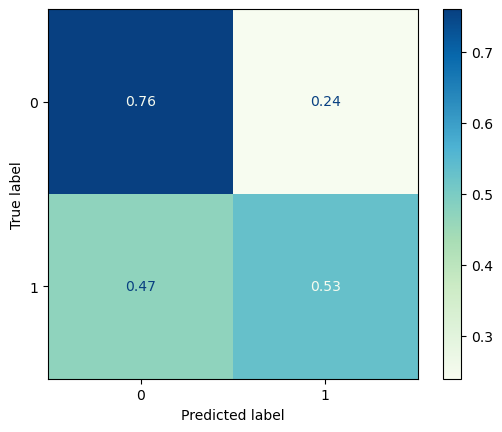

In [374]:
from sklearn.naive_bayes import GaussianNB

classifer = GaussianNB()
classifer.fit(xTrain,yTrain)
yTestPred =classifer.predict(xTest)

print(metrics.classification_report(yTest,yTestPred))
cm = metrics.confusion_matrix(yTest,yTestPred,normalize="true").round(2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format="g")

### **Multinominal**

In [393]:
from sklearn.preprocessing import Normalizer, StandardScaler

nr = Normalizer()

xTrain = nr.fit_transform(xTrain)
xTest = nr.fit_transform(xTest)

print(xTrain)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(xTest)

print(np.min(xTrain),
np.max(xTrain),
np.min(xTest),
np.max(xTest))

#, max(xTest), min(xTrain), max(xTrain)

[[9.93429333e-04 9.99886623e-01 9.93429333e-04 ... 4.96714666e-04
  4.96714666e-04 0.00000000e+00]
 [4.96978179e-04 9.99920096e-01 4.96978179e-04 ... 4.96978179e-04
  4.96978179e-04 1.49093454e-03]
 [9.91466366e-04 9.99893830e-01 1.48719955e-03 ... 4.95733183e-04
  4.95733183e-04 9.91466366e-04]
 ...
 [4.95937918e-04 9.99810843e-01 4.95937918e-04 ... 9.91875836e-04
  4.95937918e-04 4.95937918e-04]
 [4.96174359e-04 9.99791333e-01 4.96174359e-04 ... 4.96174359e-04
  4.96174359e-04 4.96174359e-04]
 [4.96231047e-04 9.99905560e-01 4.96231047e-04 ... 4.96231047e-04
  4.96231047e-04 2.48115524e-03]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[4.95995380e-04 9.99926686e-01 4.95995380e-04 ... 9.91990760e-04
  4.95995380e-04 9.91990760e-04]
 [4.96727596e-04 9.99912651e-01 4.96727596e-04 ... 9.93455192e-04
  4.96727596e-04 1.98691038e-03]
 [4.95746341e-04 9.99920369e-01 9.91492681e-04 ... 9.91492681e-04
  4.95746341e-04 1.48723902e-03]
 ...
 [4.95496581e-04 9.99912101e-01 

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       610
           1       0.00      0.00      0.00       321

    accuracy                           0.66       931
   macro avg       0.33      0.50      0.40       931
weighted avg       0.43      0.66      0.52       931



c:\Users\koray\anaconda3\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\koray\anaconda3\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\koray\anaconda3\envs\ai\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


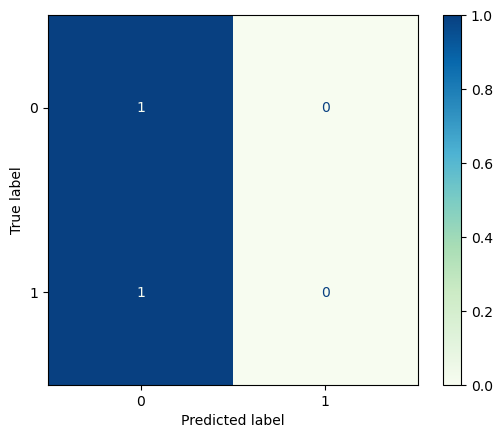

In [394]:
from sklearn.naive_bayes import MultinomialNB

classifer = MultinomialNB()
classifer.fit(xTrain,yTrain)
yTestPred =classifer.predict(xTest)

print(metrics.classification_report(yTest,yTestPred))
cm = metrics.confusion_matrix(yTest,yTestPred,normalize="true").round(2)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.GnBu,values_format="g")